In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-scientist-job-roles-in-uk/Raw_Dataset.csv
/kaggle/input/data-scientist-job-roles-in-uk/Cleaned_Dataset.csv


> **Frist let us ignore warnings** 


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Importing all the necessary libraries**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Reading datasets
cleaned_df = pd.read_csv('/kaggle/input/data-scientist-job-roles-in-uk/Cleaned_Dataset.csv')
raw_df = pd.read_csv('/kaggle/input/data-scientist-job-roles-in-uk/Raw_Dataset.csv')

In [4]:
#Showing table contents in Cleaned_Dataset
cleaned_df

Company  Company Score  \
0         Razorpoint            3.4   
1      tower Hamlets            3.7   
2                 TW            4.0   
3      NatWest Group            4.6   
4              iwoca            3.9   
..               ...            ...   
630     Qureight Ltd            3.4   
631          Causaly            3.5   
632              GSK            3.8   
633        InstaDeep            3.7   
634  Cyclotron, Inc.            4.1   

                                             Job Title  Date   Salary  \
0                                Junior Data Scientist   3.0  35000.0   
1         Assistant Data Scientist (Graduate) | R-2375   5.0  64480.0   
2                                       Data Scientist  31.0  57500.0   
3                                       Data Scientist   2.0  47500.0   
4                                 Data Scientist - Ops   7.0  75000.0   
..                                                 ...   ...      ...   
630         Senior Machine Learning Scientist/Engineer  13.0  52500.0   
631                          Machine Learning Engineer  35.0  90000.0   
632            Senior AI/ML Engineer - Computer Vision  30.0  41000.0   
633  Applied Research Scientist, Explainable Deep L...  35.0  49920.0   
634                       Azure AI Solutions Architect  32.0  73500.0   

                                                Skills Estimation Type  \
0    Data mining, Big data, R, Data analysis skills...   Employer est.   
1                           R, SQL, JavaScript, Python   Employer est.   
2                     SQL, Maths, Data science, Python   Employer est.   
3    Software deployment, Data analysis skills, Sta...   Glasdoor est.   
4                MATLAB, R, Maths, C, Machine learning   Employer est.   
..                                                 ...             ...   
630      Oracle, Cloud architecture, CSS, DevOps, PaaS   Glasdoor est.   
631  Data science, Account management, Communicatio...   Glasdoor est.   
632  TensorFlow, Cloud infrastructure, Software dep...   Glasdoor est.   
633  TensorFlow, Software deployment, NoSQL, Englis...   Employer est.   
634  Machine learning, Natural language processing,...   Glasdoor est.   

     Remote        City   Country  
0    Onsite  Manchester   England  
1    Onsite      London   England  
2    Onsite  Nottingham   England  
3    Onsite   Edinburgh  Scotland  
4    Onsite      London   England  
..      ...         ...       ...  
630  Onsite      London   England  
631  Onsite      London   England  
632  Onsite      London   England  
633  Onsite      London   England  
634  Onsite      London   England  

[635 rows x 10 columns]

In [6]:
#Showing table contents of the Raw_Dataset
raw_df

Company  Company Score  \
0                                    Razorpoint            3.4   
1                                 tower Hamlets            3.7   
2                                            TW            4.0   
3                                 NatWest Group            4.6   
4                                         iwoca            3.9   
..                                          ...            ...   
745                                    Deloitte            NaN   
746  Amazon Development Centre (London) Limited            NaN   
747                                     sennder            NaN   
748                              Mott MacDonald            NaN   
749                                    Illumina            NaN   

                                             Job Title  \
0                                Junior Data Scientist   
1         Assistant Data Scientist (Graduate) | R-2375   
2                                       Data Scientist   
3                                       Data Scientist   
4                                 Data Scientist - Ops   
..                                                 ...   
745  Manager, AI Architect, Strategy, Governance & ...   
746          Sr. Applied Scientist AGI, Contextual Ads   
747          (Senior) Artificial Intelligence Engineer   
748  Senior Software Engineer / Machine Learning En...   
749                 Senior Deep Learning / AI Engineer   

                                Location  Date  \
0                    Manchester, England    3d   
1                        London, England    5d   
2                    Nottingham, England  30d+   
3                    Edinburgh, Scotland    2d   
4                        London, England    7d   
..                                   ...   ...   
745                      London, England  30d+   
746                      London, England  30d+   
747                      London, England  30d+   
748                      London, England  30d+   
749  Cambridge, East of England, England   23d   

                              Salary  \
0               £35K (Employer est.)   
1    £31.00 Per Hour (Employer est.)   
2        £50K - £65K (Employer est.)   
3       £41K - £54K (Glassdoor est.)   
4        £60K - £90K (Employer est.)   
..                               ...   
745                              NaN   
746                              NaN   
747                              NaN   
748                              NaN   
749                              NaN   

                                                Skills  
0    Data mining, Big data, R, Data analysis skills...  
1                           R, SQL, JavaScript, Python  
2                     SQL, Maths, Data science, Python  
3    Software deployment, Data analysis skills, Sta...  
4                MATLAB, R, Maths, C, Machine learning  
..                                                 ...  
745                                                NaN  
746                                                NaN  
747                                                NaN  
748                                                NaN  
749                                                NaN  

[750 rows x 7 columns]

In [8]:
#let us make sure that cleaned_dataset has no duplicates
item0 = cleaned_df.shape[0]
cleaned_df = cleaned_df.drop_duplicates()
item1 = cleaned_df.shape[0]
print(f"Removing {item0-item1} duplicates")  #if it gives zero than we can confirm they are no duplicates

Removing 0 duplicates


In [9]:
cleaned_df.shape 

(635, 10)

In [10]:
#some randam data from dataset orelse we can find with dataframe.head()
cleaned_df.sample(7).T

366  \
Company                                         PlayStation Global   
Company Score                                                  4.0   
Job Title            Machine Learning Engineer for Game Technology   
Date                                                          33.0   
Salary                                                     75000.0   
Skills           TensorFlow, Azure, Kubernetes, Software deploy...   
Estimation Type                                      Employer est.   
Remote                                                      Onsite   
City                                                        London   
Country                                                    England   

                                                               609  \
Company                                  University of Southampton   
Company Score                                                  3.8   
Job Title        Research Fellow in Mathematical Foundations of...   
Date                                                          34.0   
Salary                                                     43500.0   
Skills           Machine learning, Natural language processing,...   
Estimation Type                                      Glasdoor est.   
Remote                                                      Onsite   
City                                                   Southampton   
Country                                                    England   

                                                        216  \
Company                                Lloyds Banking Group   
Company Score                                           3.3   
Job Title                               Lead Data Scientist   
Date                                                   20.0   
Salary                                              39500.0   
Skills           Power BI, Azure, Kubernetes, Big data, Git   
Estimation Type                               Glasdoor est.   
Remote                                               Onsite   
City                                                Bristol   
Country                                             England   

                                                               261  \
Company                                                 G-Research   
Company Score                                                  3.8   
Job Title                                Machine Learning Engineer   
Date                                                          39.0   
Salary                                                     46000.0   
Skills           Analysis skills, Project management, Data mana...   
Estimation Type                                      Glasdoor est.   
Remote                                                      Onsite   
City                                                        London   
Country                                                    England   

                                                               10   \
Company                                                       SAVA   
Company Score                                                  4.1   
Job Title                                      Data Scientist I/II   
Date                                                           5.0   
Salary                                                     47500.0   
Skills           Power BI, Signal processing, Git, SQL, Statist...   
Estimation Type                                      Glasdoor est.   
Remote                                                      Onsite   
City                                                        London   
Country                                                    England   

                                                               423  \
Company                                     Natural History Museum   
Company Score                                                  3.6   
Job Title                                         AI / ML Engineer   
Date 

In [11]:
#displays all the columns in the given dataset
cleaned_df.columns

Index(['Company', 'Company Score', 'Job Title', 'Date', 'Salary', 'Skills',
       'Estimation Type', 'Remote', 'City', 'Country'],
      dtype='object')

**Based on the columns of the given dataset let us have some valuable insights we can analyze**
Potential Problem Statements and Insights from the Dataset
General Trends and Analysis
 * Salary Analysis:
   * What is the average salary for data scientists in the UK?
   * How does salary vary based on location (e.g., London vs. other cities)?
   * Are there significant differences in salary based on company size or industry?
 * Skill Demand:
   * What are the most in-demand skills for data scientist positions in the UK?
   * How has skill demand changed over time?
   * Are there any emerging skills that are becoming increasingly important?
 * Company Preferences:
   * What are the most popular companies hiring data scientists in the UK?
   * How do the hiring practices of different companies compare in terms of salary, location, and skill requirements?
 * Job Market Dynamics:
   * How has the number of data scientist job postings changed over time?
   * Are there any seasonal trends or fluctuations in job availability?
   * What is the average time it takes for a data scientist job to be filled?
Specific Questions and Hypotheses
 * Location Impact:
   * Do data scientists in London earn significantly more than those in other UK cities?
   * Are there specific skills that are more in demand in certain locations?
 * Company Size and Salary:
   * Do larger companies tend to offer higher salaries to data scientists?
   * Are there any differences in skill requirements or job responsibilities based on company size?
 * Skill Proficiency and Salary:
   * Are there specific skills that are strongly correlated with higher salaries?
   * How does experience level impact salary and skill requirements?
 * Industry Trends:
   * Which industries are hiring the most data scientists?
   * Are there any industry-specific skill sets that are particularly valuable?
By analyzing this dataset, we can gain valuable insights into the UK data science job market, identify trends and patterns, and inform career decisions for aspiring data scientists.

In [12]:
cleaned_df['City'].value_counts().head(30)

City
London           362
Manchester        28
Cambridge         16
Bristol           14
Edinburgh          9
Glasgow            9
Birmingham         8
Cardiff            7
Reading            7
Belfast            7
Nottingham         6
Oxford             6
Leeds              5
Gloucester         5
Milton Keynes      4
Kettering          3
High Wycombe       3
Leicester          3
Sheffield          3
Farringdon         3
Preston            2
Walsall            2
Liverpool          2
Coventry           2
Norwich            2
Douglas            2
Eastleigh          2
Warwickshire       2
Stevenage          2
Cheltenham         2
Name: count, dtype: int64

In [13]:
cleaned_df['Company'].value_counts().head(30)

Company
JPMorgan Chase & Co                             12
Capgemini Invent                                11
Meta                                            10
Spotify                                          8
InstaDeep                                        8
Google                                           7
Datasource                                       7
Eka Finance                                      6
Chubb                                            5
Amazon Development Centre (Scotland) Limited     5
GSK                                              5
Bumble Inc.                                      5
EY                                               5
marshmallow                                      4
IQVIA                                            4
causaLens                                        4
Roke Manor Research Limited                      4
Choreograph                                      4
Monzo                                            4
Deloitte               

In [14]:
# Check for missing values in the cleaned dataset
cleaned_df.isnull().sum()

Company             0
Company Score       0
Job Title           0
Date                0
Salary              0
Skills              0
Estimation Type     0
Remote              0
City               54
Country            54
dtype: int64

In [50]:
# Convert 'Date' column to datetime format
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce')
cleaned_df['Date'].sample(10)

366   1970-01-01 00:00:00.000000033
307   1970-01-01 00:00:00.000000019
234   1970-01-01 00:00:00.000000043
568   1970-01-01 00:00:00.000000044
0     1970-01-01 00:00:00.000000003
530   1970-01-01 00:00:00.000000005
618   1970-01-01 00:00:00.000000037
602   1970-01-01 00:00:00.000000040
410   1970-01-01 00:00:00.000000010
518   1970-01-01 00:00:00.000000041
Name: Date, dtype: datetime64[ns]

In [17]:
cleaned_df.describe().T

count                           mean  \
Company Score  635.0                       3.850866   
Date             635  1970-01-01 00:00:00.000000027   
Salary         635.0                   65487.181102   

                                         min                            25%  \
Company Score                            1.7                            3.6   
Date           1970-01-01 00:00:00.000000002  1970-01-01 00:00:00.000000014   
Salary                               24500.0                        49250.0   

                                         50%                            75%  \
Company Score                            3.9                            4.1   
Date           1970-01-01 00:00:00.000000032  1970-01-01 00:00:00.000000039   
Salary                               63000.0                        76250.0   

                                         max          std  
Company Score                            5.0     0.465001  
Date           1970-01-01 00:00:00.000000044          NaN  
Salary                              200000.0  22964.43774

In [18]:
# Distribution of job titles
plt.figure(figsize=(240,120))
sns.countplot(y='Job Title', data=cleaned_df, order=cleaned_df['Job Title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

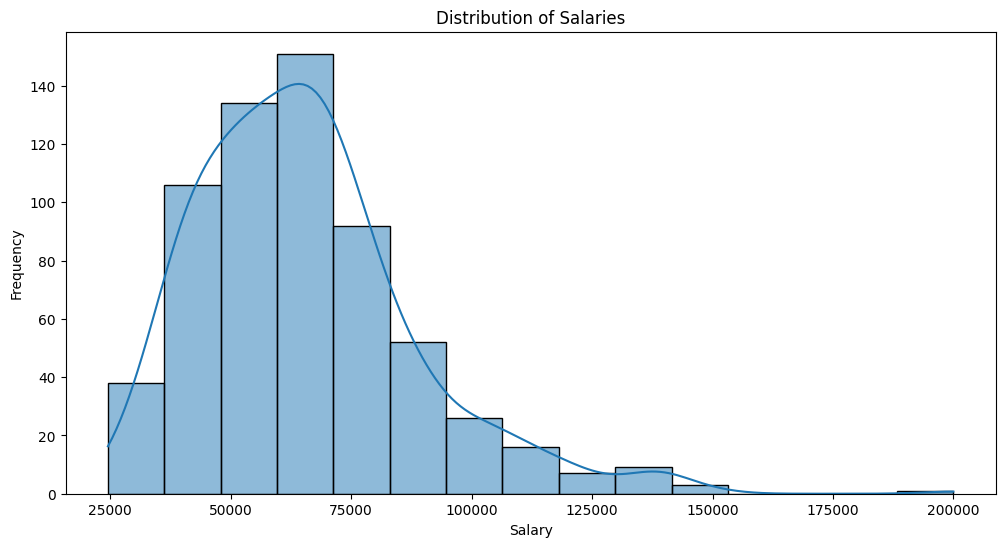

In [19]:
# Distribution of salaries
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Salary'], bins=15, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

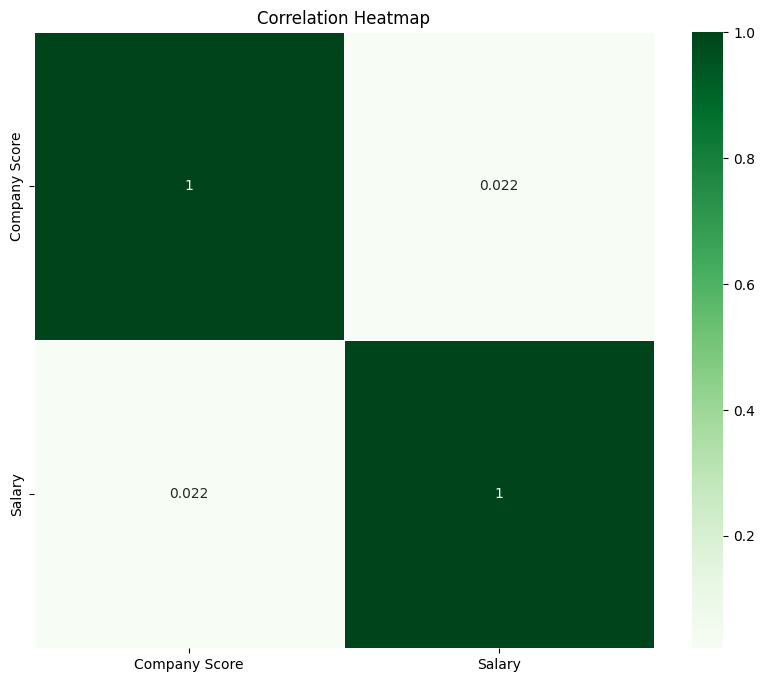

In [21]:
#To understand the relationships between numeric variables
# Correlation heatmap:
numeric_df = cleaned_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

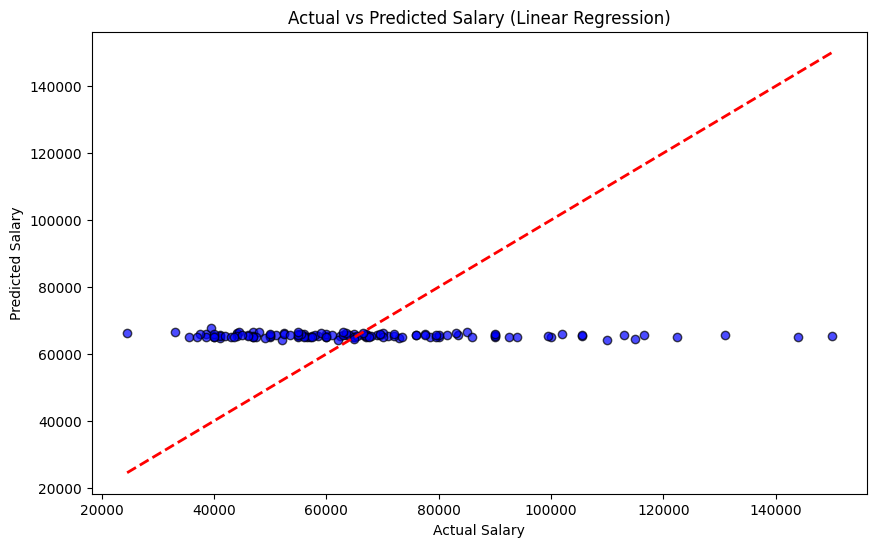

In [23]:
#simple linear regression model to predict salaries
X = cleaned_df[['Company Score']]
y = cleaned_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

#implementing scatter plot
# Scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add titles and labels
plt.title('Actual vs Predicted Salary (Linear Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

plt.show()

In [26]:
Salary_remote=cleaned_df.groupby("Remote")["Salary"].mean().reset_index()

Salary_grouped_country = cleaned_df.groupby("Country")["Salary"].mean()

Salary_grouped_country = Salary_grouped_country.sort_values(ascending=False).head()

Country_Salary = Salary_grouped_country.reset_index()

#defining mean for plot
meaner=cleaned_df["Salary"].mean()

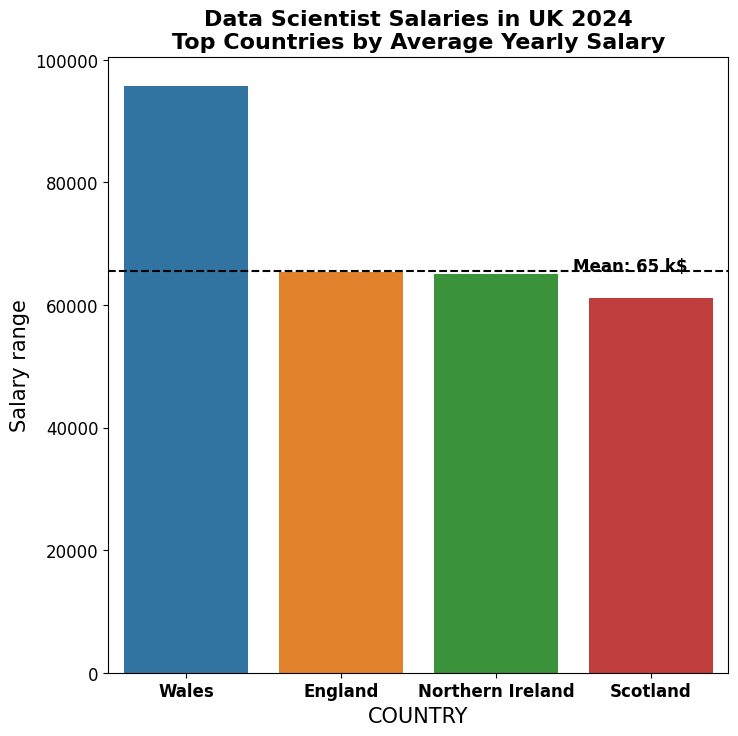

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x="Country",y="Salary",data=Country_Salary)
plt.title('Data Scientist Salaries in UK 2024\nTop Countries by Average Yearly Salary', fontsize=16, weight='bold', color='black')
plt.ylabel("Salary range",fontsize=15)
plt.xlabel("COUNTRY",fontsize=15)
plt.xticks(fontsize=12,weight="bold")
plt.yticks(fontsize=12)
plt.axhline(y=meaner , color='black', linestyle='--')
plt.text(len(Country_Salary) - 1.5, meaner + 10, f'Mean: {meaner / 1000:.0f} k$', color='black', weight='bold', fontsize=12)
plt.show()

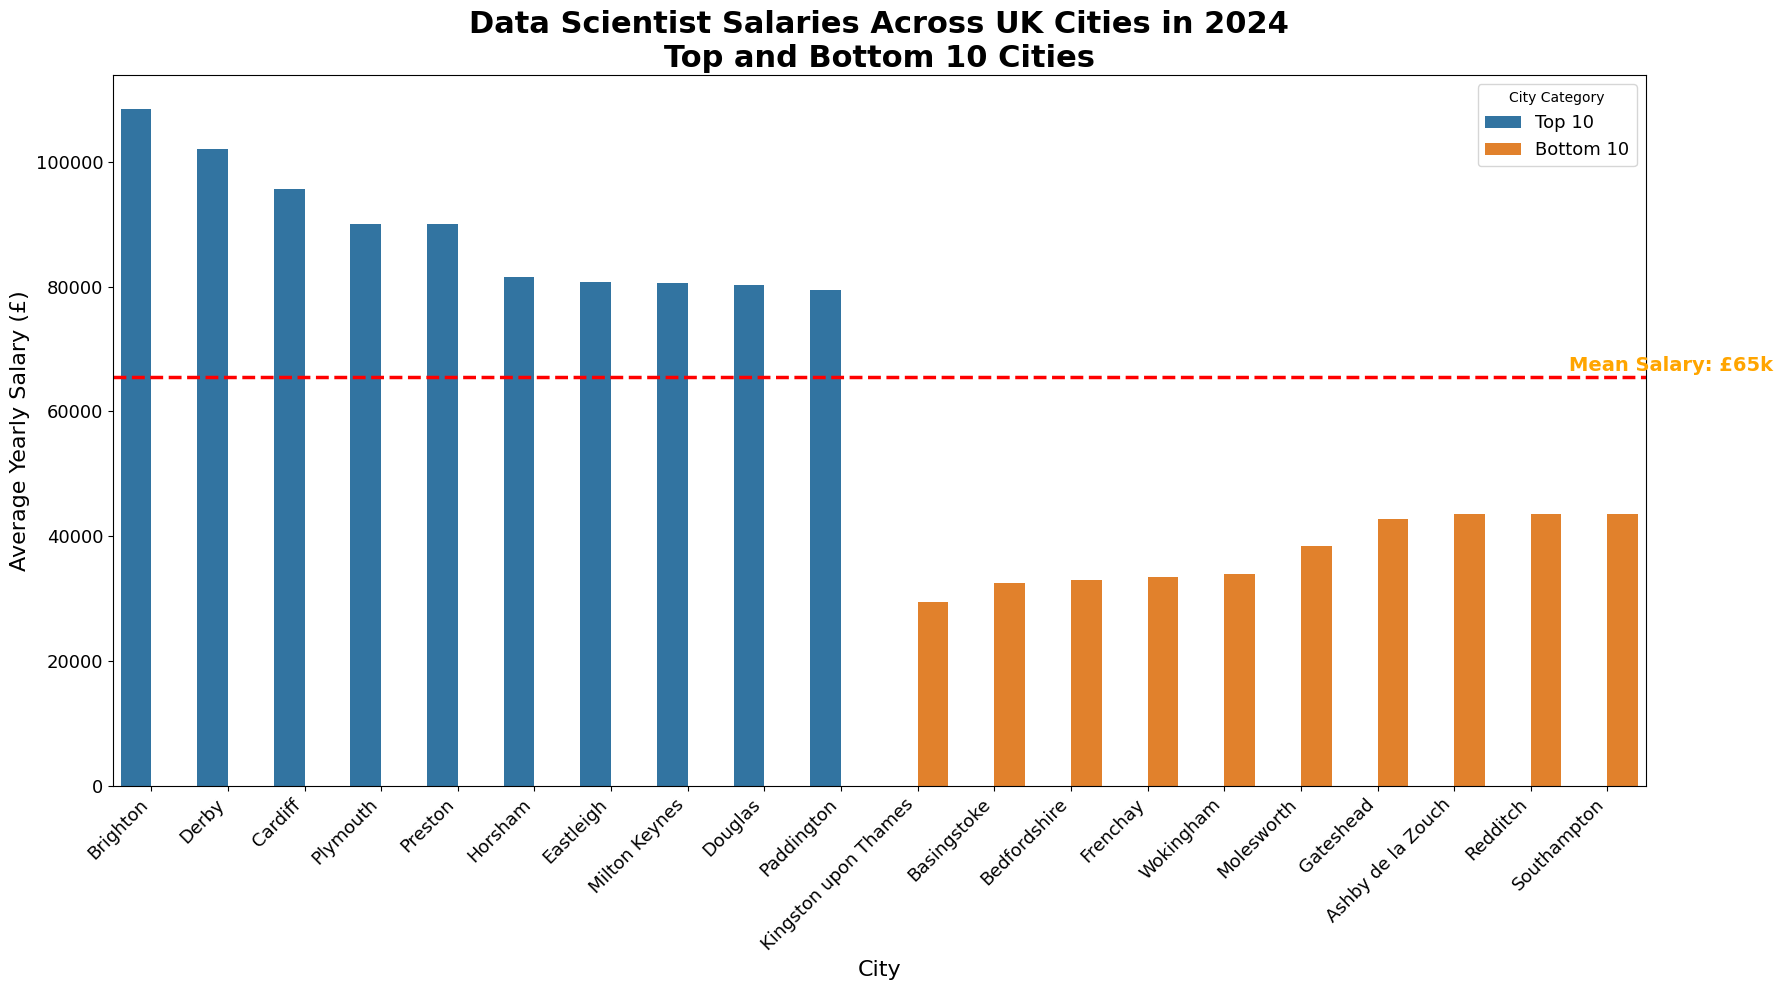

In [34]:
# Group by City and calculate the average salary
avg_salary_per_city = cleaned_df.groupby("City")["Salary"].mean().reset_index()

# Extract top 10 and bottom 10 cities
top_cities = avg_salary_per_city.nlargest(10, "Salary")
bottom_cities = avg_salary_per_city.nsmallest(10, "Salary")

# Assign labels for categories
top_cities["Category"] = "Top 10"
bottom_cities["Category"] = "Bottom 10"

# Step 4: Combine top and bottom cities into one DataFrame
city_salary_comparison = pd.concat([top_cities, bottom_cities])

# Calculate the overall mean salary
overall_mean_salary = cleaned_df["Salary"].mean().round(0)

# Plot the data
plt.figure(figsize=(18, 10))
sns.barplot(x="City", y="Salary", hue="Category", data=city_salary_comparison)

# Add a line for the overall mean salary
plt.axhline(y=overall_mean_salary, color='red', linestyle='--', linewidth=2.5)
plt.text(len(city_salary_comparison) - 1.5, overall_mean_salary + 1000, f'Mean Salary: £{overall_mean_salary / 1000:.0f}k', 
         fontsize=14, weight='bold', color='orange')

# Customize the plot labels and title
plt.title('Data Scientist Salaries Across UK Cities in 2024\nTop and Bottom 10 Cities', fontsize=22, weight='bold')
plt.xlabel('City', fontsize=16)
plt.ylabel('Average Yearly Salary (£)', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title="City Category", fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()


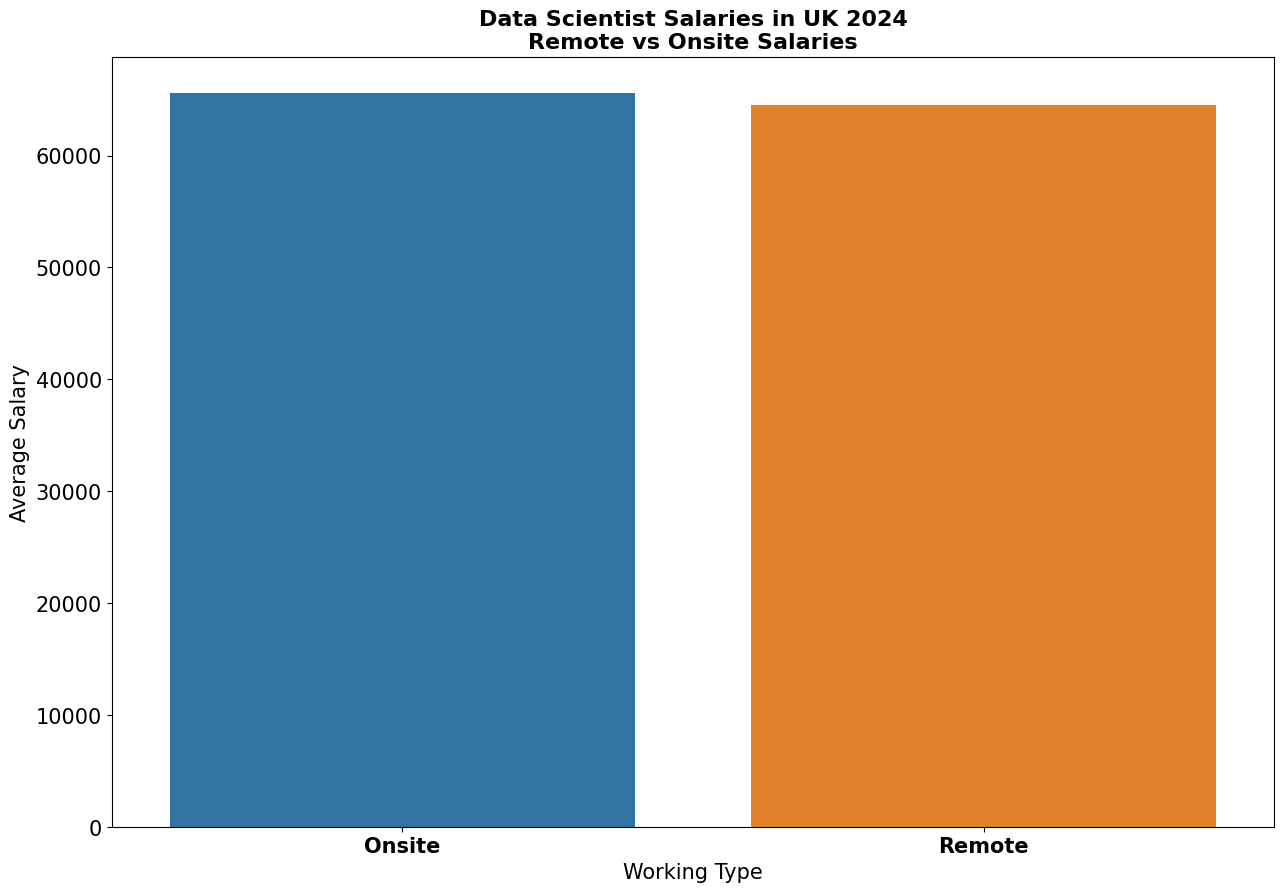

In [35]:
#checking analysis based on on-site and remote job
plt.figure(figsize=(15,10))
sns.barplot(x="Remote",y="Salary",data=Salary_remote)
plt.title('Data Scientist Salaries in UK 2024\nRemote vs Onsite Salaries', fontsize=16, weight='bold', color='black')
plt.ylabel("Average Salary",fontsize=15)
plt.xlabel("Working Type",fontsize=15)
plt.xticks(fontsize=15,weight="bold")
plt.yticks(fontsize=15)
plt.show()

In [36]:
# Calculate combined average salary
combined_average_salary = cleaned_df['Salary'].mean()

print("Combined average salary:", combined_average_salary)


Combined average salary: 65487.18110236221


In [37]:
unique_roles = cleaned_df['Job Title'].unique()

for role in unique_roles:
    role_df = cleaned_df[cleaned_df['Job Title'] == role]

    # Calculate average salary (assuming single value represents both min and max)
    average_salary = role_df['Salary'].mean()

    print(f"Average salary for {role}: {average_salary}")

Average salary for Junior Data Scientist: 47250.0
Average salary for Assistant Data Scientist (Graduate) | R-2375: 64480.0
Average salary for Data Scientist: 57694.02985074627
Average salary for Data Scientist - Ops: 75000.0
Average salary for Data Scientist, Programming & Editorial: 124000.0
Average salary for Data Scientist I/II: 47500.0
Average salary for Graduate Software Engineer / Data Scientist: Forecasting for Electricity Trading: 48000.0
Average salary for Data Scientist - IDDO: 60500.0
Average salary for Data Scientist, Payments Fraud: 62000.0
Average salary for Data Scientist - Forecasting: 63000.0
Average salary for Data Scientist / Senior Data Scientist: 40000.0
Average salary for Network Data Scientist: 52500.0
Average salary for Data Scientist Apprentice: 32000.0
Average salary for Data Scientist, Product Analytics: 44500.0
Average salary for Data Scientist (retail/ecom): 56000.0
Average salary for Internship - Data Science: 36000.0
Average salary for Data Scientist - In

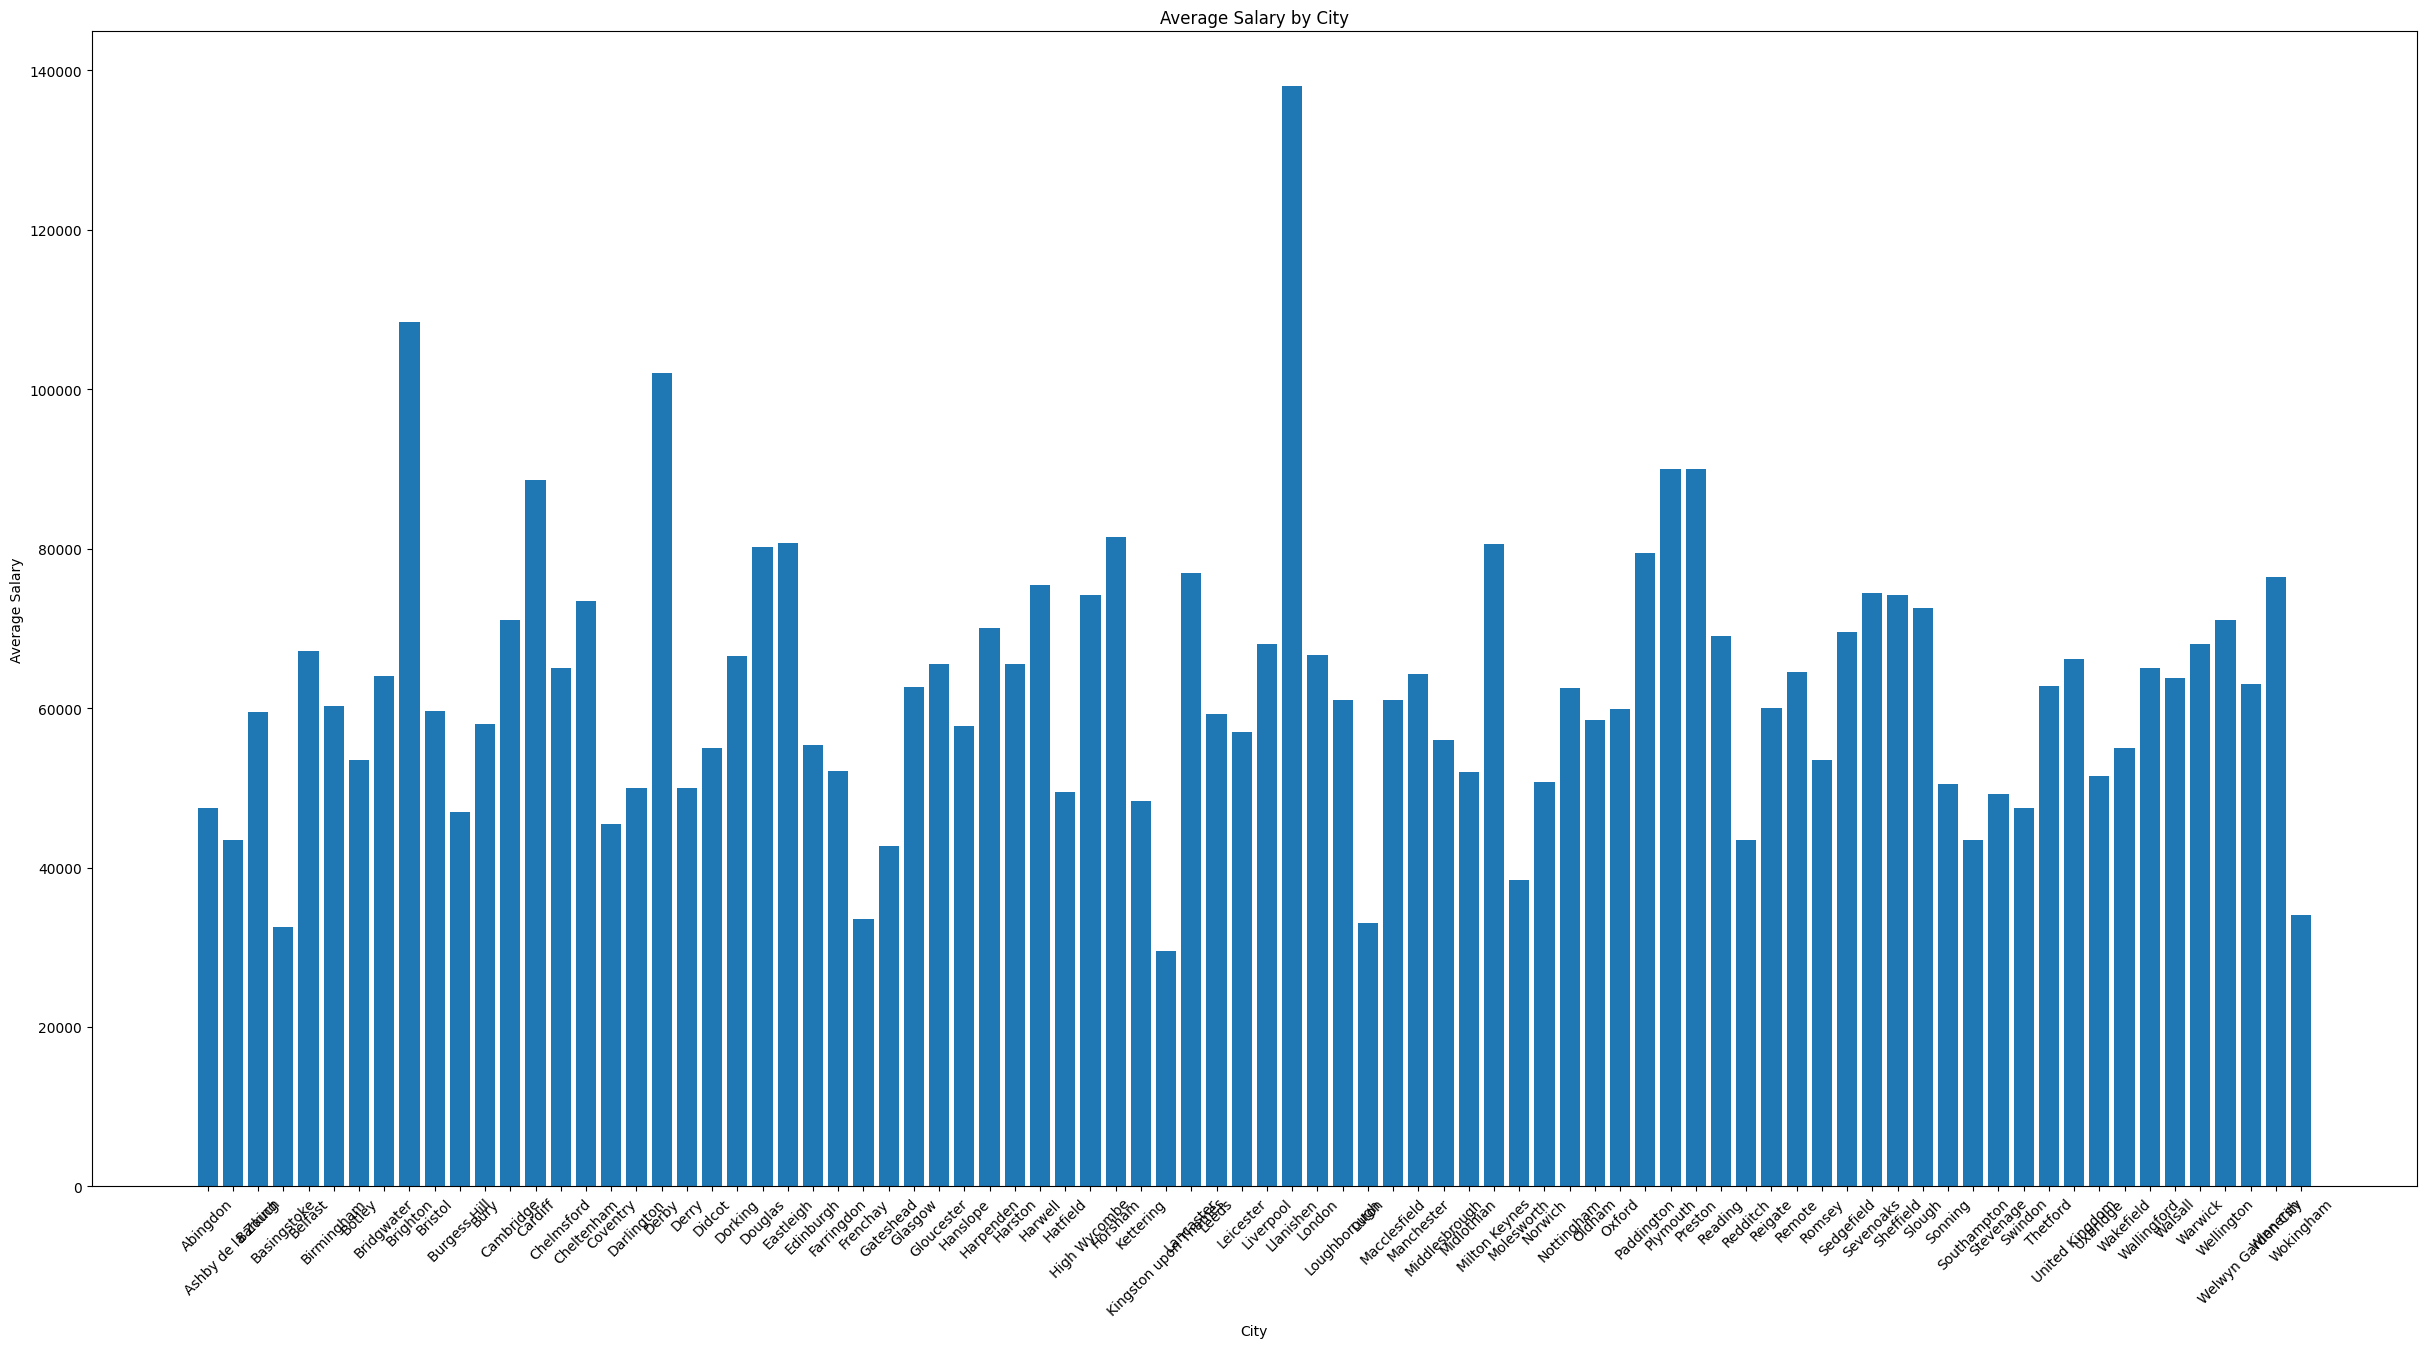

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cleaned_df' is your DataFrame
# Extract city or region from Location (if needed)
cleaned_df['City'] = raw_df['Location'].str.split(',').str[0]

# Group by city and calculate average salary
location_salary = cleaned_df.groupby('City')['Salary'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(30,15))
plt.bar(location_salary['City'], location_salary['Salary'])
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.title('Average Salary by City')
plt.xticks(rotation=45)
plt.show()

ANOVA F-statistic: 1.1432649491586597
ANOVA p-value: 0.28537446073659445


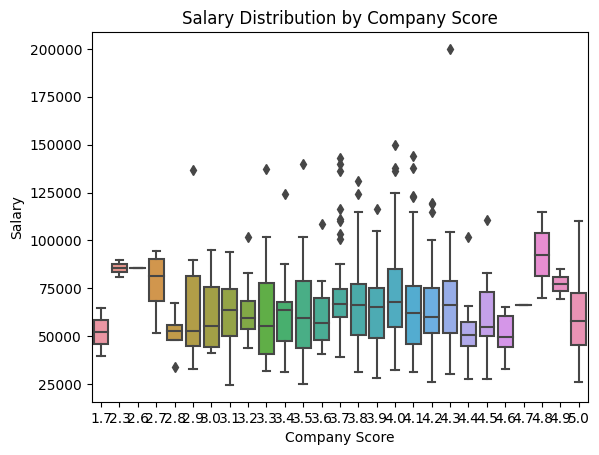

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Group by Company and Company Score
grouped_data = cleaned_df.groupby(['Company', 'Company Score'])['Salary'].mean().reset_index()

# Statistical Test (ANOVA)
f_statistic, p_value = stats.f_oneway(*[grouped_data['Salary'][grouped_data['Company Score'] == score] for score in grouped_data['Company Score'].unique()])
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Box Plot
sns.boxplot(x='Company Score', y='Salary', data=cleaned_df)
plt.title('Salary Distribution by Company Score')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.show()

Top In-Demand Skills:
 Machine learning: 211
 SQL: 147
TensorFlow: 133
 R: 106
 Data science: 87
 Python: 85
 Communication skills: 75
 AWS: 71
 Google Cloud Platform: 66
 Spark: 61


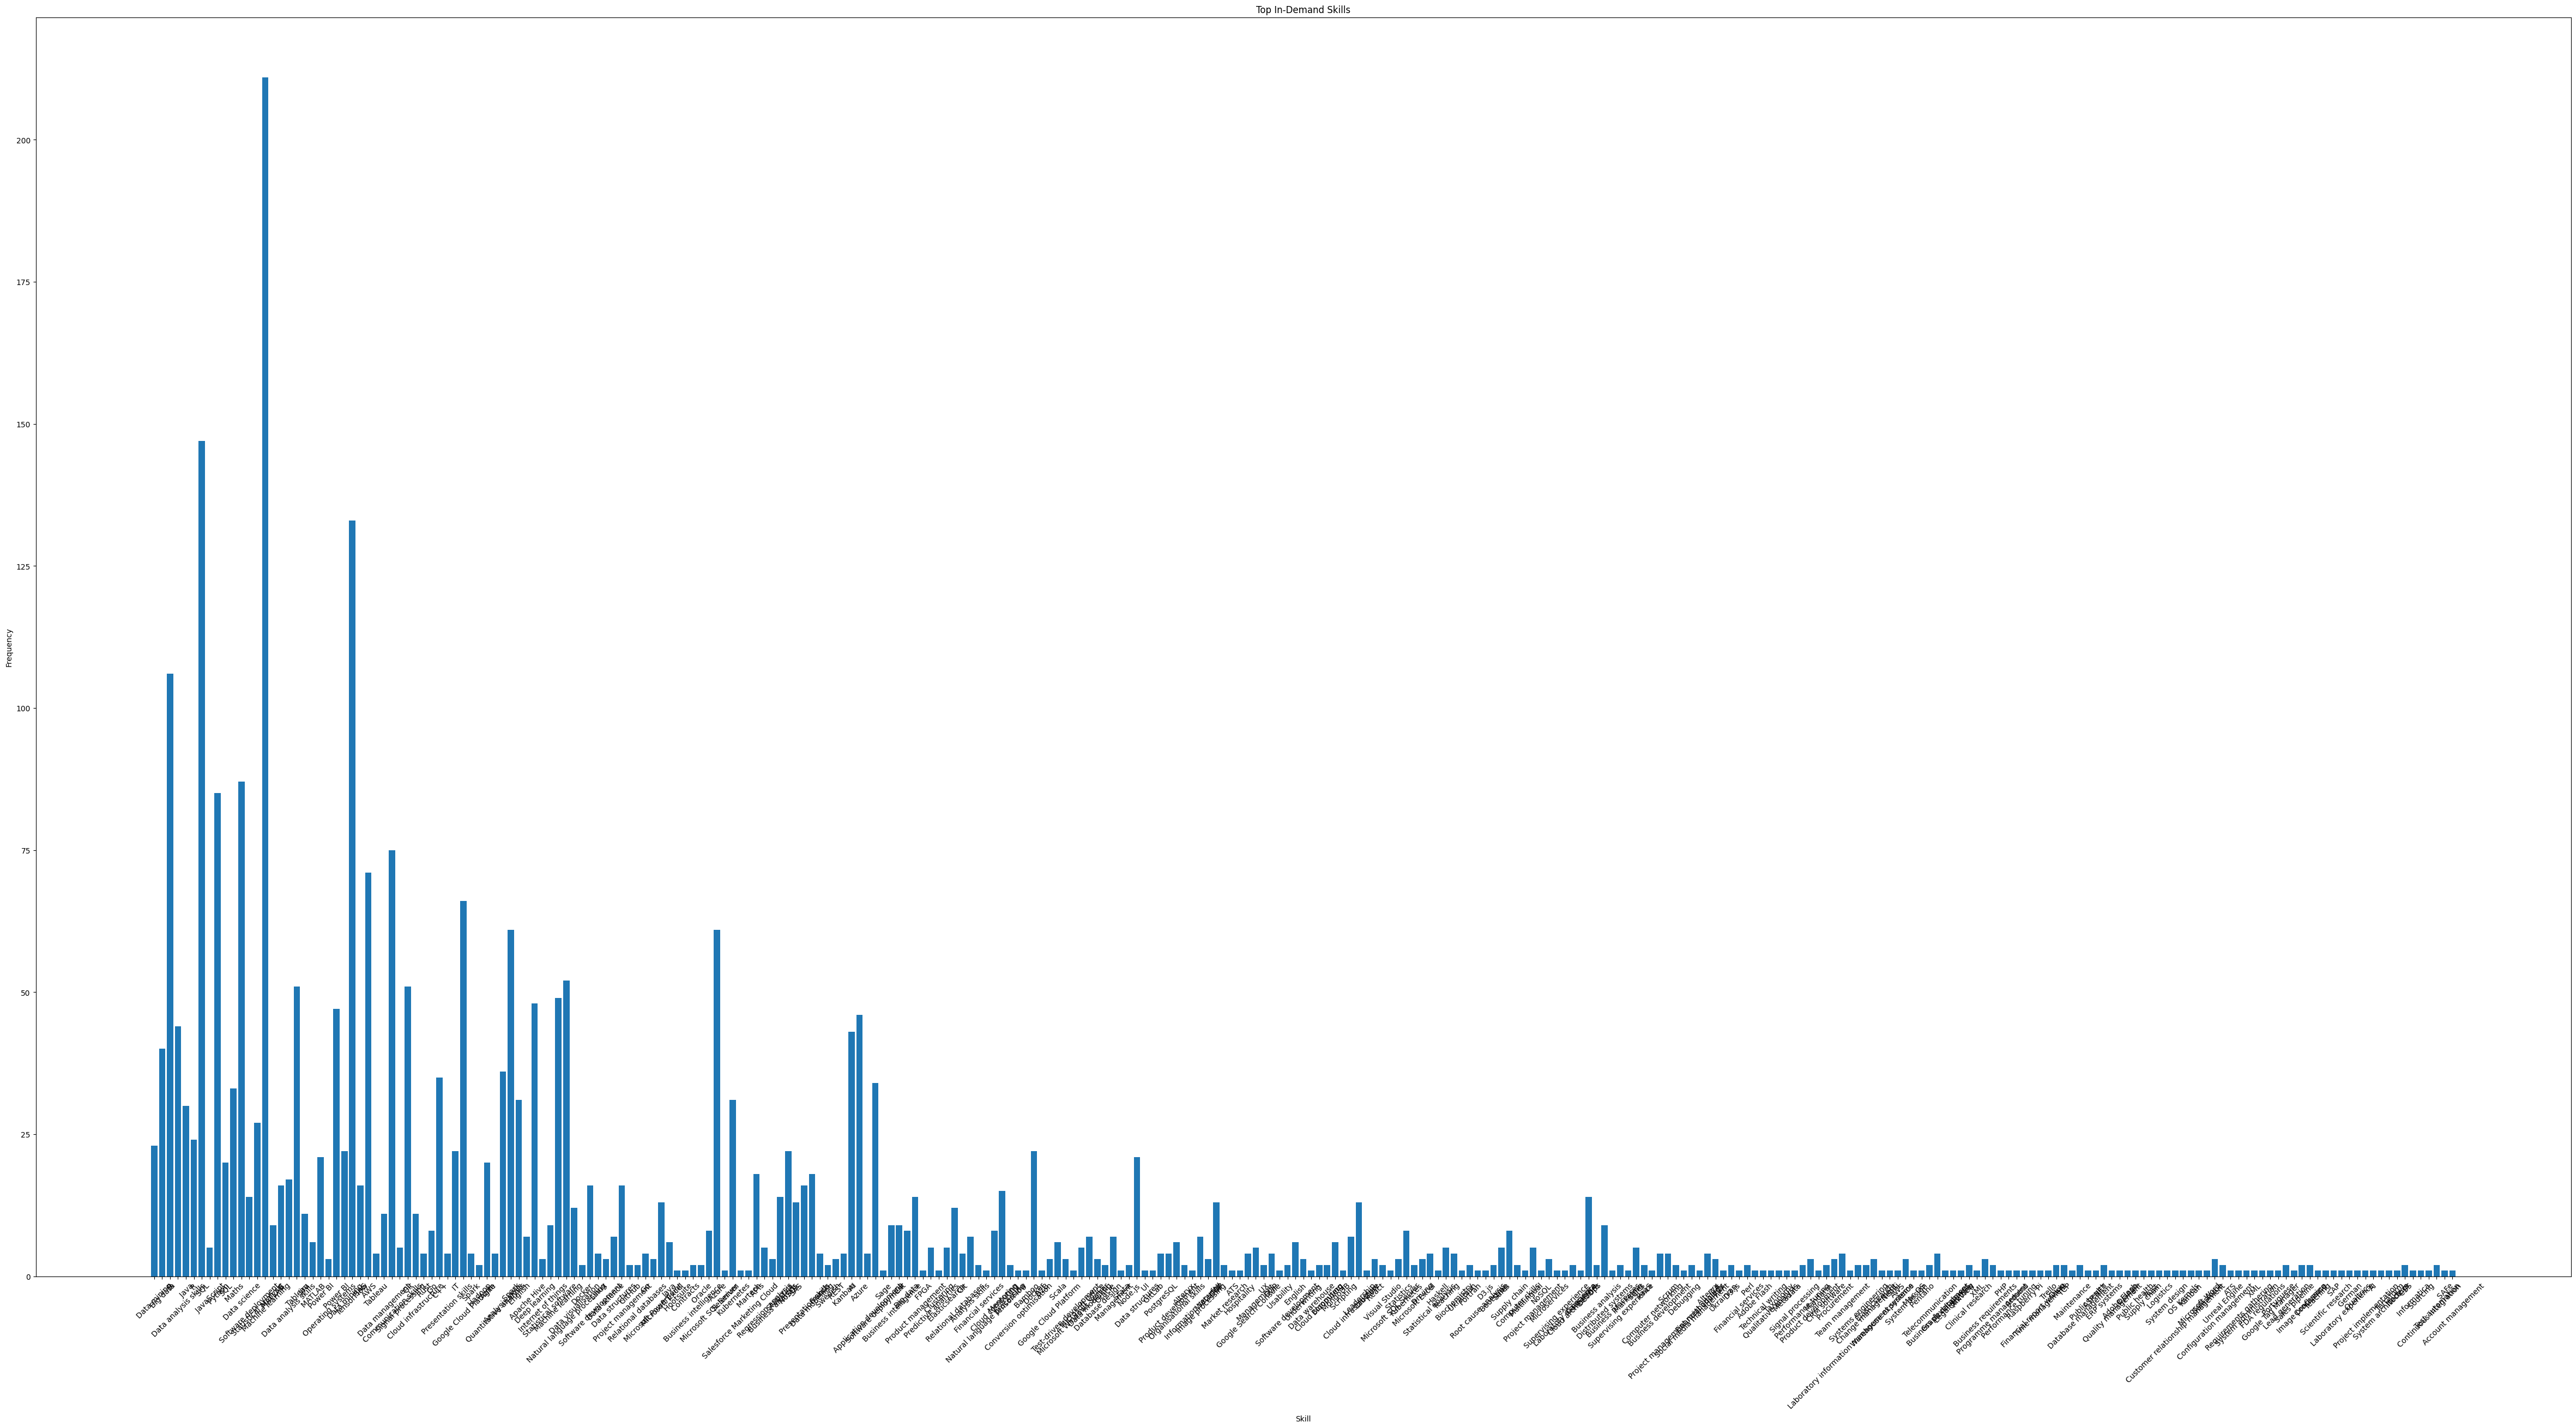

In [42]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt


# Extract skills (assuming skills are separated by commas)
cleaned_df['Skills_List'] = cleaned_df['Skills'].str.split(',')

# Flatten the list of skills
all_skills = [skill for sublist in cleaned_df['Skills_List'] for skill in sublist]

# Count skill occurrences
skill_counts = Counter(all_skills)

# Print top skills
print("Top In-Demand Skills:")
for skill, count in skill_counts.most_common(10):
    print(f"{skill}: {count}")
    

# Create a bar chart
plt.figure(figsize=(60,30))
plt.bar(skill_counts.keys(), skill_counts.values())
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.title('Top In-Demand Skills')
plt.xticks(rotation=45)
plt.show()

Top Hiring Companies:
Company
JPMorgan Chase & Co                             12
Capgemini Invent                                11
Meta                                            10
Spotify                                          8
InstaDeep                                        8
Google                                           7
Datasource                                       7
Eka Finance                                      6
Chubb                                            5
Amazon Development Centre (Scotland) Limited     5
Name: count, dtype: int64


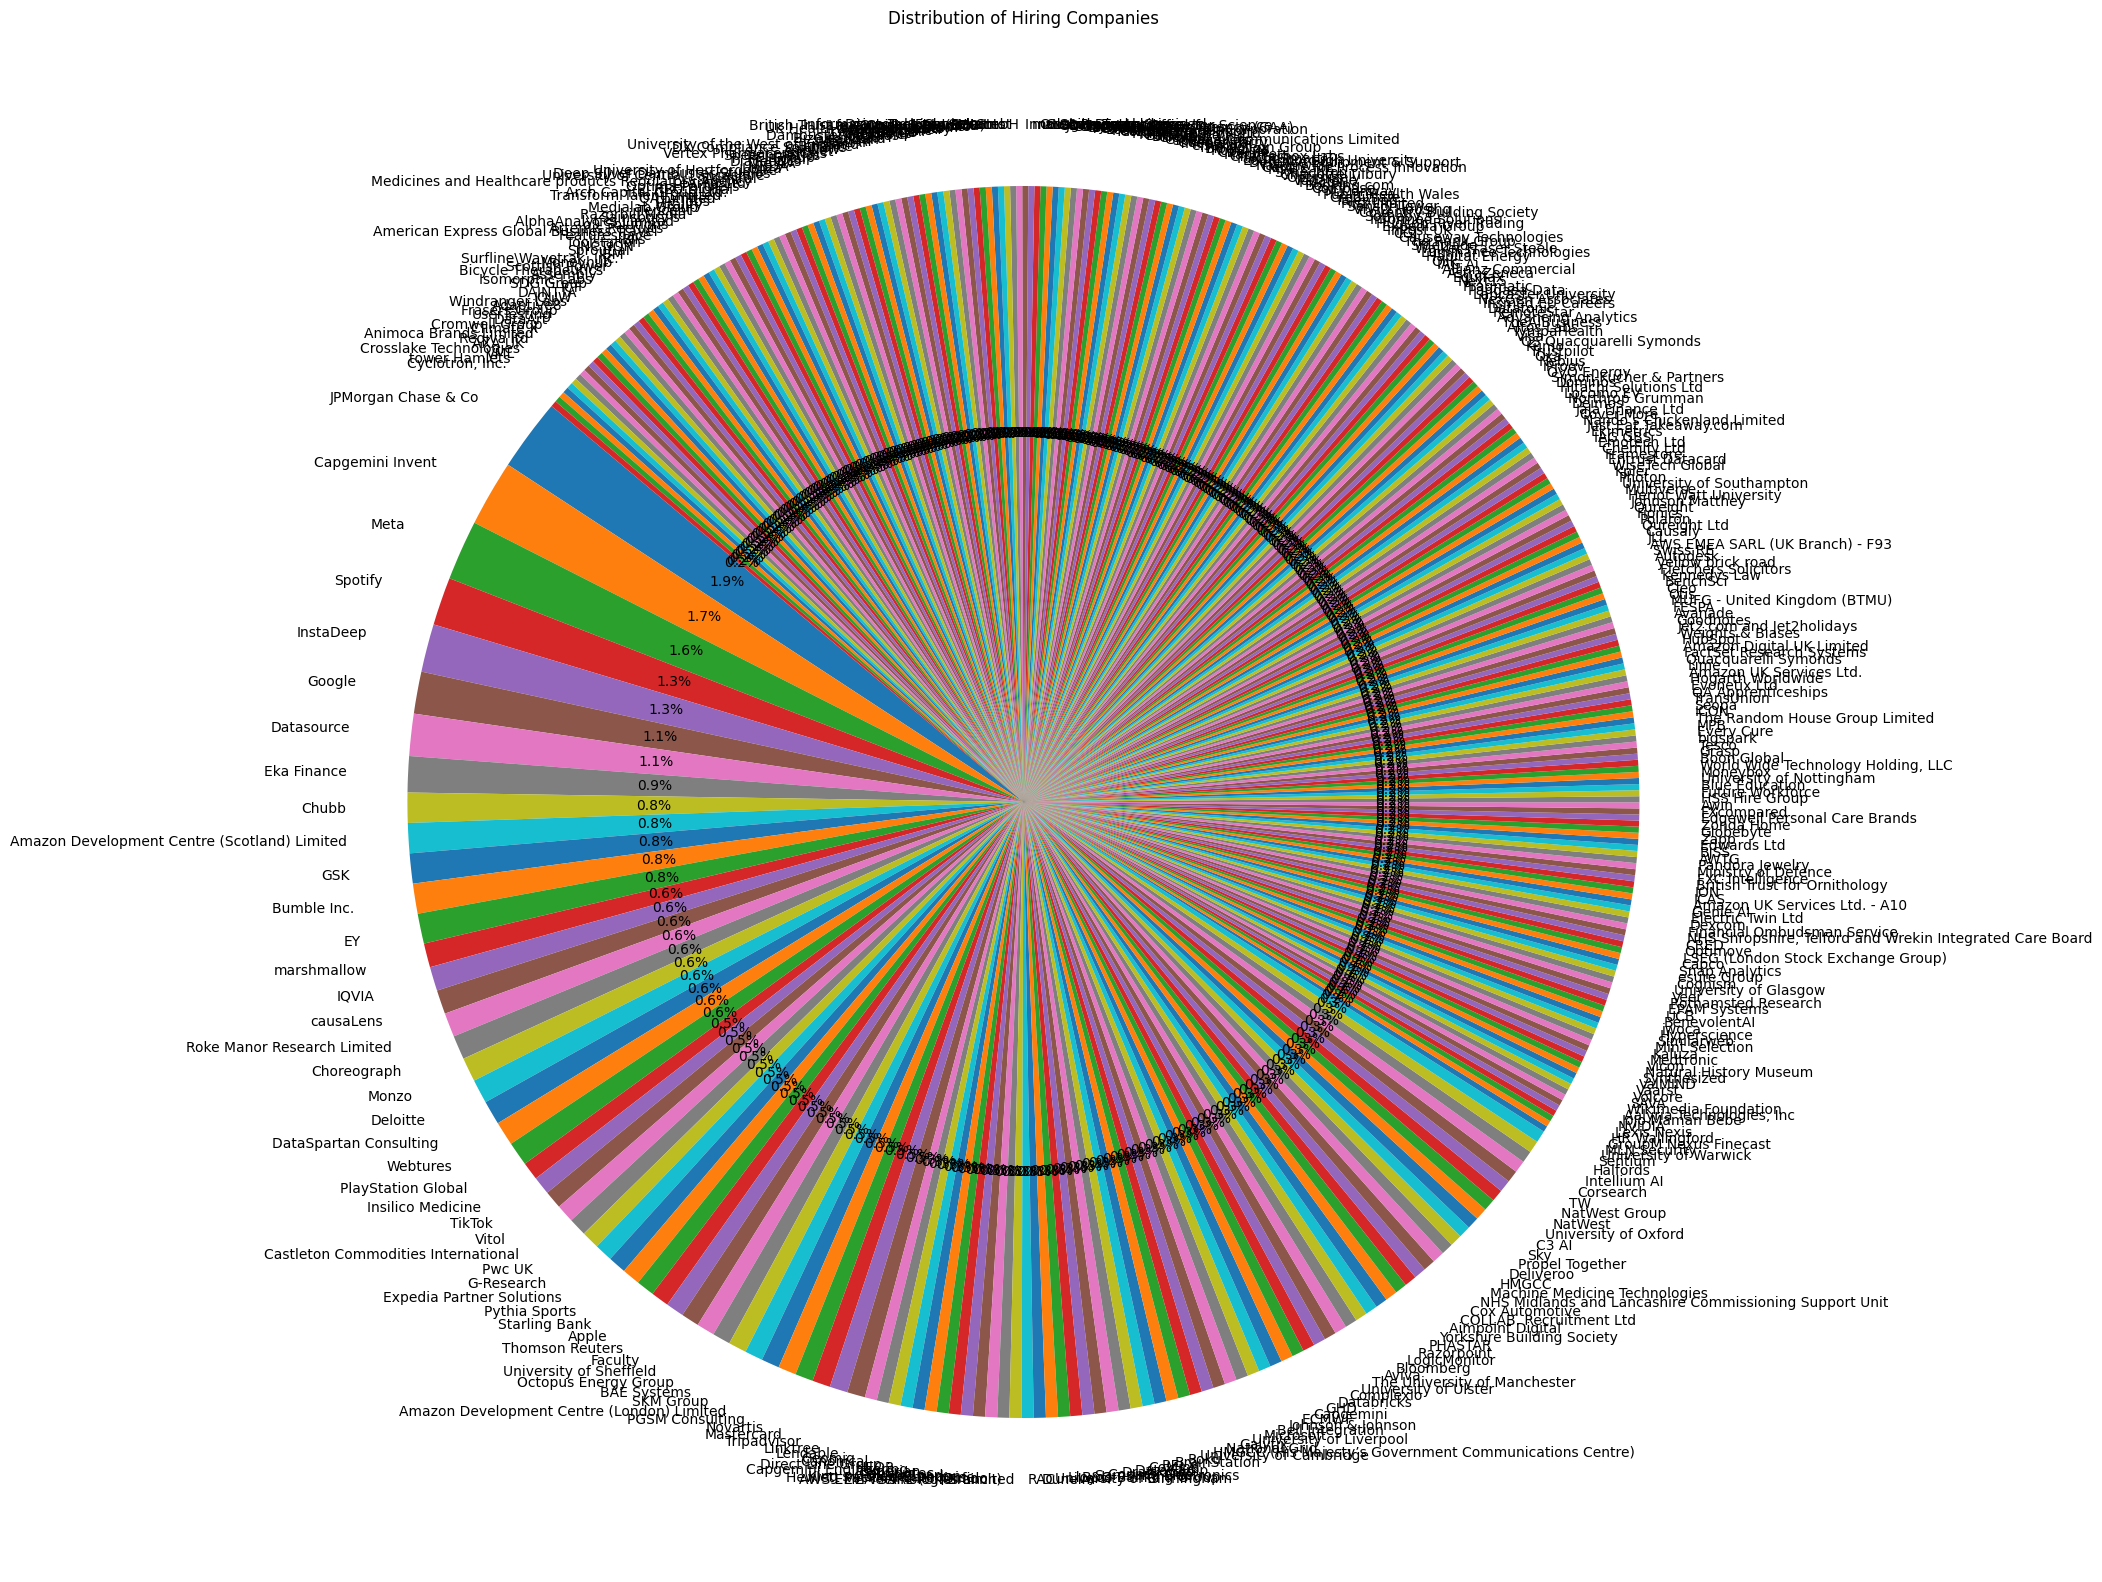

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Count company occurrences
company_counts = cleaned_df['Company'].value_counts()

# Group by Company
grouped_data = cleaned_df.groupby('Company').agg({'Salary': 'mean', 'City': 'count', 'Skills': 'nunique'}).reset_index()

# Print top companies
print("Top Hiring Companies:")
print(company_counts.head(10))

# Visualize company characteristics
plt.figure(figsize=(20,20))
plt.pie(company_counts.values, labels=company_counts.index, autopct='%1.1f%%', startangle=140)  # Removed parenthesis after values
plt.title('Distribution of Hiring Companies')
plt.show()

Average Salaries:
                           Company    Salary  City  Skills
89   Creative Artists Agency (CAA)  200000.0     1       1
142                        Fionics  144000.0     1       1
234         Luminance Technologies  143000.0     1       1
223                     Learna Ltd  138000.0     1       1
295            Public Health Wales  137000.0     1       1
Location Preferences:
                 Company        Salary  City  Skills
206  JPMorgan Chase & Co  61541.666667    12      12
60      Capgemini Invent  63727.272727    11      11
250                 Meta  64950.000000    10      10
199            InstaDeep  66802.500000     8       8
336              Spotify  73562.500000     8       8
Skill Requirements:
                 Company        Salary  City  Skills
206  JPMorgan Chase & Co  61541.666667    12      12
60      Capgemini Invent  63727.272727    11      11
250                 Meta  64950.000000    10      10
199            InstaDeep  66802.500000     8       8
336

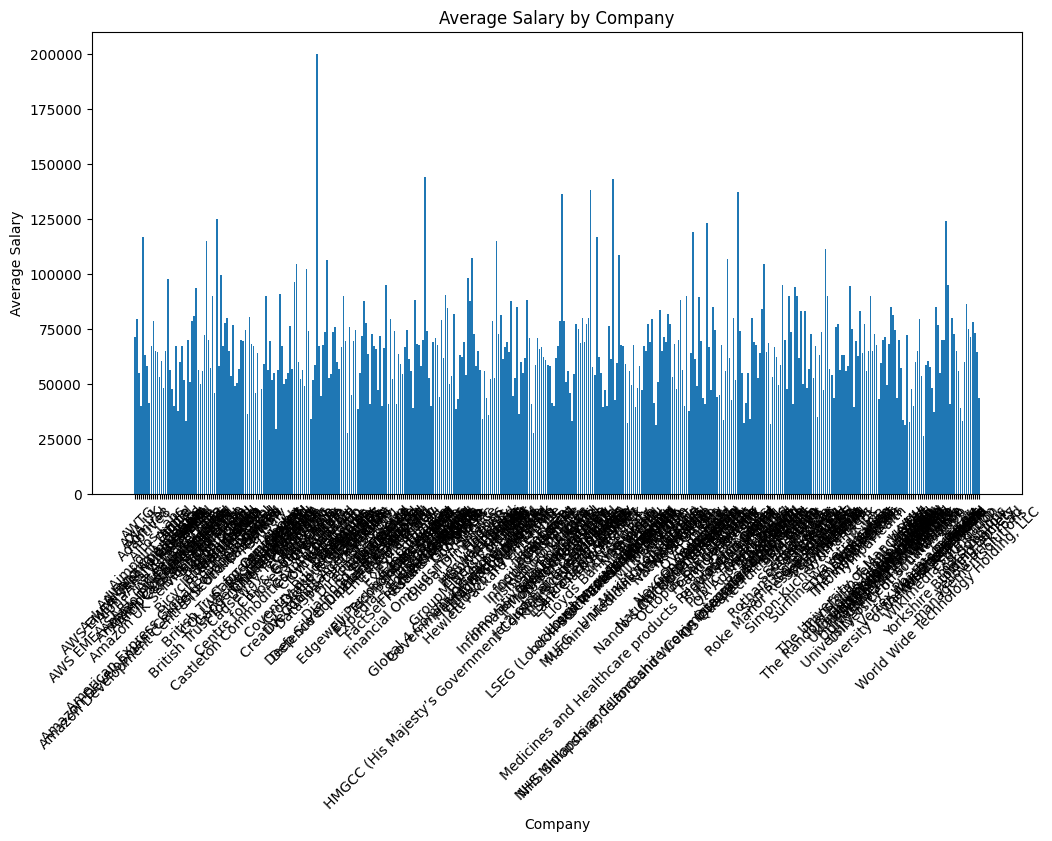

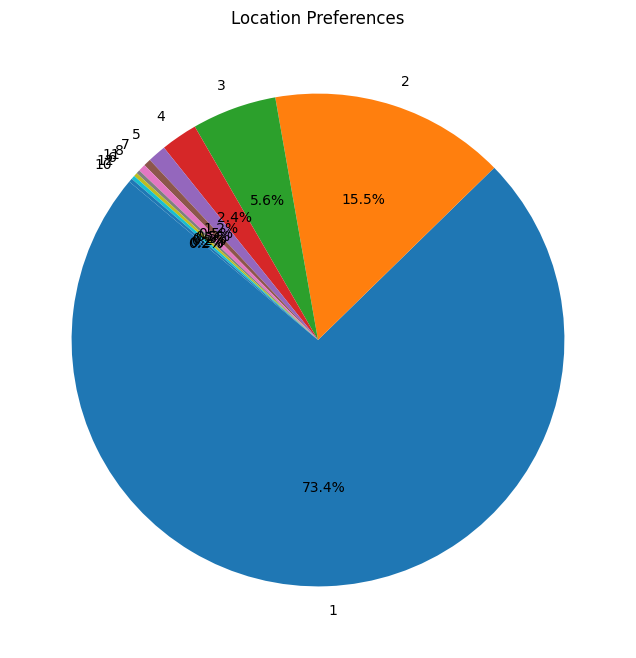

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Company
grouped_data = cleaned_df.groupby('Company').agg({'Salary': 'mean', 'City': 'count', 'Skills': 'nunique'}).reset_index()

# Compare average salaries
print("Average Salaries:")
print(grouped_data.sort_values(by='Salary', ascending=False).head(5))

# Compare location preferences
print("Location Preferences:")
print(grouped_data.sort_values(by='City', ascending=False).head(5))

# Compare skill requirements
print("Skill Requirements:")
print(grouped_data.sort_values(by='Skills', ascending=False).head(5))


# Visualize average salaries (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Company'], grouped_data['Salary'])
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company')
plt.xticks(rotation=45)
plt.show()

# Visualize location preferences (pie chart)
location_counts = grouped_data['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location Preferences')
plt.show()


t-statistic: 0.24511348569675573
p-value: 0.8069809450486478


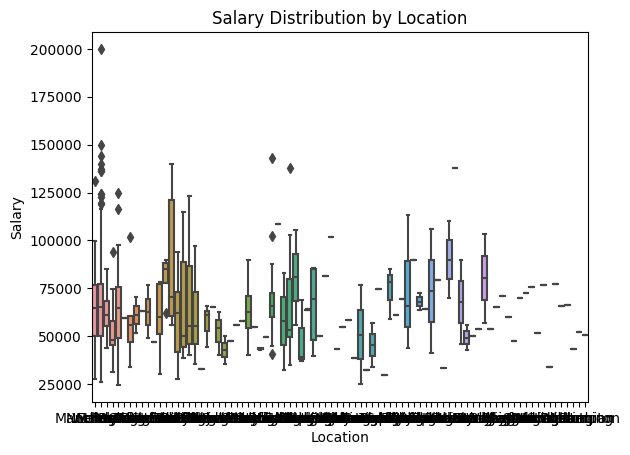

In [45]:
import seaborn as sns
import scipy.stats as stats

# Group by Location
grouped_data = cleaned_df.groupby('City')['Salary'].mean().reset_index()

# Statistical Test (t-test)
london_salary = grouped_data['Salary'][grouped_data['City'] == 'London']
other_salaries = grouped_data['Salary'][grouped_data['City'] != 'London']
t_statistic, p_value = stats.ttest_ind(london_salary, other_salaries)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Box Plot
sns.boxplot(x='City', y='Salary', data=cleaned_df)
plt.title('Salary Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.show()

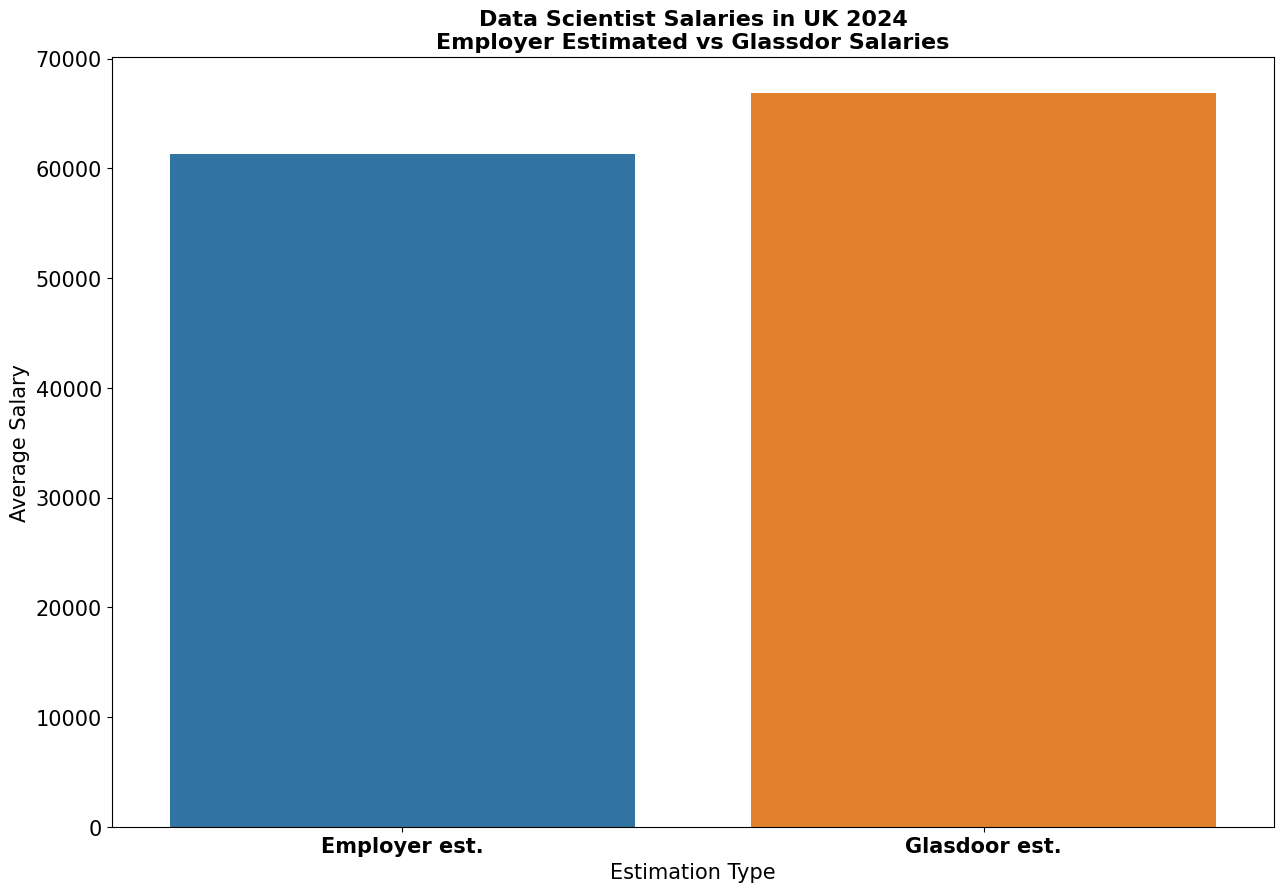

In [53]:
Estimation_Type=cleaned_df.groupby("Estimation Type")["Salary"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="Estimation Type",y="Salary",data=Estimation_Type)
plt.title('Data Scientist Salaries in UK 2024\nEmployer Estimated vs Glassdor Salaries', fontsize=16, weight='bold', color='black')
plt.ylabel("Average Salary",fontsize=15)
plt.xlabel("Estimation Type",fontsize=15)
plt.xticks(fontsize=15,weight="bold")
plt.yticks(fontsize=15)
plt.show()